# Logistic Regression with Python

We'll be trying to predict a classification- survival or deceased.Let's begin our understanding of implementing Logistic Regression in Python for classification
Logistic Regression an extension of Linear regression where the dependent variable is categorical and not
continuous. It predicts the probability of the outcome variable.
Logistic regression(aka Logit Regression, maximum-entropy classification (MaxEnt) or the log-linear
classifier) can be binomial,ordinal or multinomial. In the binomial or binary logistic regression, the outcome can
have only two possible types of values (e.g. “Yes” or “No”, “Success” or “Failure”). Multinomial logistic refers to
cases where the outcome can have three or more possible types of values (e.g., “good” vs. “very good” vs.
“best” ). Generally, the outcome is coded as “0″ and “1″ in binary logistic regression.Ordinal logistic
(https://en.wikipedia.org/wiki/Ordered_logit) regression deals with dependent variables that are ordered.



# Representation of Logistic regression
Just like a lInear regression model, a logistic regression model also computes a weighted sum of input
features(and adds a bias term to it). However, unlike linear regression, it calculates the logistic of the results so
that the output is always between o and 1.
Logistic Regression model estimated probability (vectorized form)
The logisitc also called as logit is denoted by σ is a sigmoid function and it outputs a number between 0 and 1.

# The Confusion Matrix tells us the following:
There are two possible predicted classes: “yes” and “no”. If we were predicting that employees would leave
an organisation, for example, “yes” would mean they will, and “no” would mean they won’t leave the
organisation.
The classifier made a total of 165 predictions (e.g., 165 employees were being studied).
Out of those 165 cases, the classifier predicted “yes” 110 times, and “no” 55 times.
In reality, 105 employees in the sample leave the organisation, and 60 do not

# Basic terms related to Confusion matrix:
True positives (TP): These are cases in which we predicted yes (employees will leave the organisation),
and employees actually leave i.e 100
True negatives (TN): We predicted no(employees will not leave the organisation) and they don’t leave i.e
50
False positives (FP): We predicted yes they will leave, but they don’t leave. (Also known as a “Type I
error.”) i.e 10
False negatives (FN): We predicted no they will not leave, but they actually leave (Also known as a “Type
II error.”) i.e 5

# Import Libraries
Let's import some libraries to get started!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt;
import seaborn as sns


%matplotlib inline

# The Data

In [2]:
train = pd.read_csv(r'C:\Users\tayal\Downloads\train.csv')

In [3]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


# Exploratory Data Analysis

Let's begin some exploratory data analysis! We'll start by checking out missing data!

In [ ]:
#Ploting Graph for better Understanding of Column Selection for classification

# Missing Data

We can use seaborn to create a simple heatmap to see where we are missing data!

<AxesSubplot:xlabel='Survived', ylabel='count'>

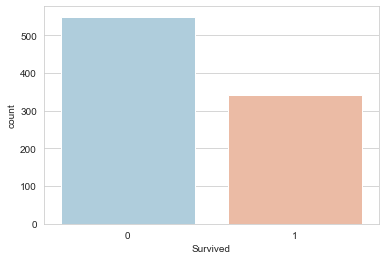

In [4]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train,palette='RdBu_r')

<AxesSubplot:xlabel='Survived', ylabel='count'>

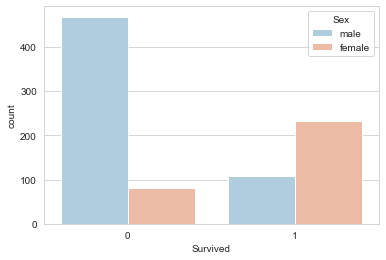

In [5]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')

<AxesSubplot:xlabel='Survived', ylabel='count'>

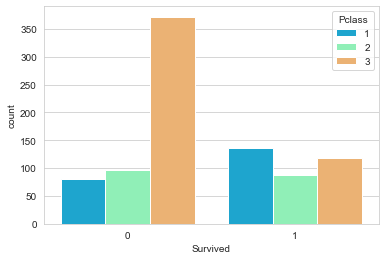

In [6]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')

In [7]:
train.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

Roughly 20 percent of the Age data is missing. The proportion of Age missing is likely small enough for reasonable replacement with some form of imputation. Looking at the Cabin column, it looks like we are just missing too much of that data to do something useful with at a basic level. We'll probably drop this later, or change it to another feature like "Cabin Known: 1 or 0"

In [ ]:
#Filling of the NULL Values

# Data Cleaning

We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation). However we can be smarter about this and check the average age by passenger class.

We can see the wealthier passengers in the higher classes tend to be older, which makes sense. We'll use these average age values to impute based on Pclass for Age

In [8]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [9]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

In [10]:
train['Embarked'] = train['Embarked'].fillna('S')

In [ ]:
#droping unwanted Column

In [11]:
train.drop('Cabin',axis=1,inplace=True)

In [12]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


# Converting Categorical Features

We'll need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [14]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [15]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [16]:
train = pd.concat([train,sex,embark],axis=1)

In [17]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


# Building a Logistic Regression model

Let's start by splitting our data into a training set and test set (there is another test.csv file that you can play around with in case you want to use all this data for training).

# Train Test Split

In [9]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train.drop(['Survived'],axis=1), 
                                                    train['Survived'], test_size=0.10, 
                                                    random_state=101)

# Logistic Regression(Traning and Predicting)

In [20]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

In [22]:
predictions = logmodel.predict(X_test)
X_test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
331,332,1,45.5,0,0,28.500,1,0,1
700,701,1,18.0,1,0,227.525,0,0,0
748,749,1,19.0,1,0,53.100,1,0,1
751,752,3,6.0,0,1,12.475,1,0,1
481,482,2,29.0,0,0,0.000,1,0,1


In [23]:
predictions

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1], dtype=int64)

# Evaluating

We can check precision ,recall,f1-score using classification report

In [24]:
from sklearn.metrics import classification_report,confusion_matrix

In [25]:
print(confusion_matrix(y_test,predictions))

[[45  6]
 [17 22]]


In [26]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.73      0.88      0.80        51
           1       0.79      0.56      0.66        39

    accuracy                           0.74        90
   macro avg       0.76      0.72      0.73        90
weighted avg       0.75      0.74      0.74        90



# Decision Tree Classification

Decision Tree is a Supervised learning technique that can be used for both classification and Regression problems, but mostly it is preferred for solving Classification problems.

It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome.

In a Decision tree, there are two nodes, which are the Decision Node and Leaf Node. Decision nodes are used to make any decision and have multiple branches, whereas Leaf nodes are the output of those decisions and do not contain any further branches.

The decisions or the test are performed on the basis of features of the given dataset.

It is a graphical representation for getting all the possible solutions to a problem/decision based on given conditions.

It is called a decision tree because, similar to a tree, it starts with the root node, which expands on further branches and constructs a tree-like structure.

In order to build a tree, we use the CART algorithm, which stands for Classification and Regression Tree algorithm.

A decision tree simply asks a question, and based on the answer (Yes/No), it further split the tree into subtrees.


In [27]:
from sklearn.tree import DecisionTreeClassifier

In [28]:
dt_model=DecisionTreeClassifier()
dt_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [29]:
dt_pred = dt_model.predict(X_test)

In [30]:
print(confusion_matrix(y_test,dt_pred))

[[45  6]
 [14 25]]


In [31]:
print(classification_report(y_test,dt_pred))

              precision    recall  f1-score   support

           0       0.76      0.88      0.82        51
           1       0.81      0.64      0.71        39

    accuracy                           0.78        90
   macro avg       0.78      0.76      0.77        90
weighted avg       0.78      0.78      0.77        90



# Random Forest Classification

Machine learning models are usually broken down into supervised and unsupervised learning algorithms. Supervised models are created when we have defined (labeled) parameters, both dependent and independent. Conversely, unsupervised methods are used when we don’t have defined (unlabeled) parameters. For this article we will focus on a specific supervised model, known as Random Forest, and will demonstrate a basic use case on Titanic survivor data.

Before going into the details of the Random Forest model, it’s important to define decision trees, ensemble models, and bootstrapping which are essential to the understanding of the random forest model

Bootstrapping is the process of randomly sampling subsets of a dataset over a given number of iterations and a given number of variables. These results are then averaged together to obtain a more powerful result. Bootstrapping is an example of an applied ensemble model.

The bootstrapping Random Forest algorithm combines ensemble learning methods with the decision tree framework to create multiple randomly drawn decision trees from the data, averaging the results to output a result that often times leads to strong predictions/classifications.

We will continue using the sklearn module for training our Random Forest Model, specifically the RandomForestClassifier function. The RandomForestClassifier documentation shows many different parameters we can select for our model. Some of the important parameters are highlighted below:

n_estimators — the number of decision trees you will be running in the model
max_depth — this sets the maximum possible depth of each tree
max_features — the maximum number of features the model will consider when determining a split
bootstrapping — the default value for this is True, meaning the model follows bootstrapping principles (defined earlier).
max_samples — This parameter assumes bootstrapping is set to True, if not, this parameter doesn’t apply. In the case of True, this value sets the largest size of each sample for each tree.

In [32]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
rf= RandomForestClassifier(n_estimators=500)
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=500)

In [34]:
rf_pre=rf.predict(X_test)

In [35]:
print(confusion_matrix(y_test,rf_pre))

[[48  3]
 [14 25]]


In [36]:
print(classification_report(y_test,rf_pre))

              precision    recall  f1-score   support

           0       0.77      0.94      0.85        51
           1       0.89      0.64      0.75        39

    accuracy                           0.81        90
   macro avg       0.83      0.79      0.80        90
weighted avg       0.83      0.81      0.80        90

